## Data Preprocessing and Insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
# Load the data, specifying the correct encoding
online_retail_data = pd.read_csv('/content/online_retail.csv', encoding='latin1')

In [8]:
df=online_retail_data

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
# Drop rows with missing CustomerID
online_retail_data.dropna(subset=['CustomerID'], inplace=True)

In [15]:
# Create TotalPrice column
online_retail_data['TotalPrice'] = online_retail_data['Quantity'] * online_retail_data['UnitPrice']

In [16]:
online_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [17]:
# Convert InvoiceDate to datetime
online_retail_data['InvoiceDate'] = pd.to_datetime(online_retail_data['InvoiceDate'])

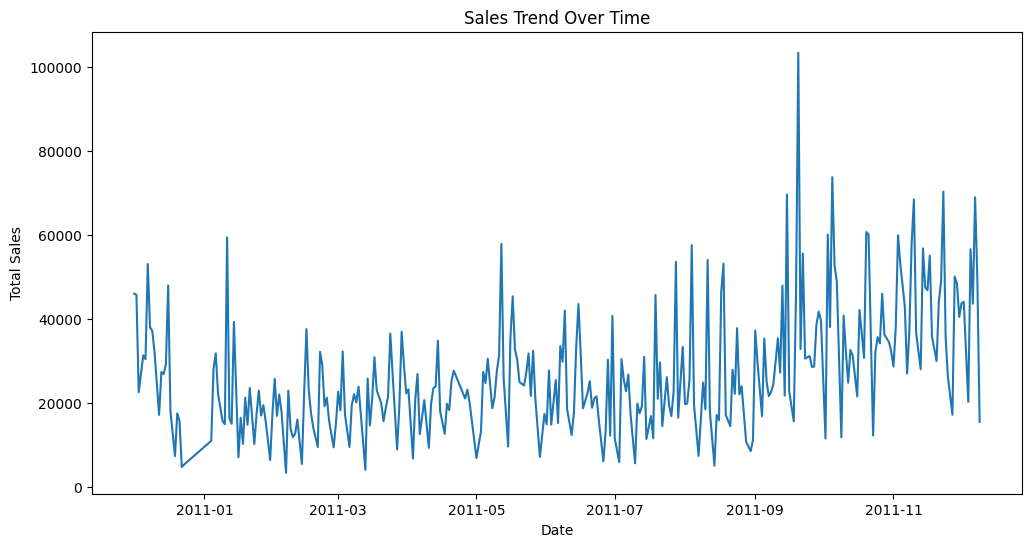

In [18]:
# Sales trends
sales_trend = online_retail_data.groupby(online_retail_data['InvoiceDate'].dt.date)['TotalPrice'].sum()
sales_trend.plot(figsize=(12, 6))
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [19]:
# Most popular products
popular_products = online_retail_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(popular_products)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64


In [20]:
# Top customers
top_customers = online_retail_data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_customers)

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: TotalPrice, dtype: float64


In [21]:
# Country sales
country_sales = online_retail_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(country_sales)

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64


## Customer Segmentation

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [22]:
# Reference date for recency calculation
reference_date = online_retail_data['InvoiceDate'].max() + dt.timedelta(days=1)

In [24]:
# RFM calculation
rfm = online_retail_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [25]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2094.88


In [26]:
# Normalize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

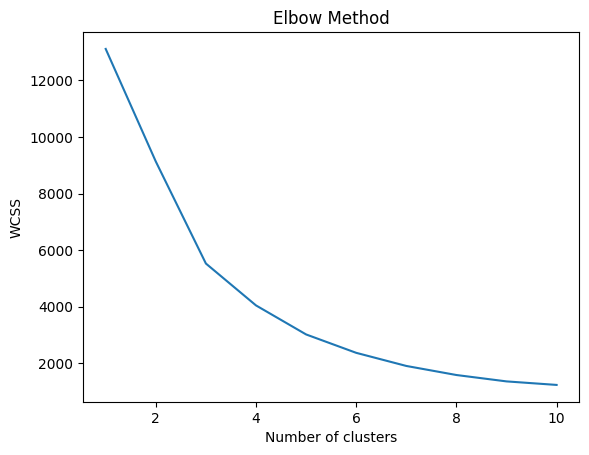

In [27]:
# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# Apply K-Means clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Analyze clusters
cluster_analysis = rfm.groupby('Cluster').mean()
print(cluster_analysis)

           CustomerID     Recency  Frequency       Monetary
Cluster                                                    
0        15285.392237   41.606500   4.802461    1478.515539
1        15280.000000    7.666667  89.000000  182181.981667
2        15357.643054  247.951242   1.805888     453.488888
3        15139.500000    9.181818  40.672727   18441.961455


### CLV Segmentation


Customer Lifetime Value (CLV) estimates the total revenue a business can reasonably expect from a single customer account throughout their relationship with the company.

Method:

Calculate the average purchase value.
Determine the average purchase frequency rate.

Compute the customer value.

Calculate the average customer lifespan.

Derive the CLV by multiplying these metrics.

In [32]:
# Average Purchase Value
online_retail_data['TotalPrice'] = online_retail_data['Quantity'] * online_retail_data['UnitPrice']
customer_value = online_retail_data.groupby('CustomerID')['TotalPrice'].sum() / online_retail_data.groupby('CustomerID')['InvoiceNo'].nunique()

# Average Purchase Frequency Rate
purchase_frequency = online_retail_data.groupby('CustomerID')['InvoiceNo'].nunique() / len(online_retail_data['InvoiceDate'].unique())

# Customer Value
customer_value = purchase_frequency * customer_value

# Average Customer Lifespan
customer_lifespan = online_retail_data.groupby('CustomerID')['InvoiceDate'].apply(lambda x: (x.max() - x.min()).days / 365)

# Customer Lifetime Value
clv = customer_value * customer_lifespan

# Combine into DataFrame
clv_df = pd.DataFrame({'CustomerID': clv.index, 'CLV': clv.values})
print(clv_df.head())


   CustomerID       CLV
0     12346.0  0.000000
1     12347.0  0.210655
2     12348.0  0.067867
3     12349.0  0.000000
4     12350.0  0.000000


### Behavioral Segmentation



Behavioral segmentation divides customers based on their behavior, such as purchasing habits, user status, or feedback. This method often uses a combination of transactional, usage, and engagement data.

Method:

Identify key behavioral attributes (e.g., purchase frequency, types of products bought, return rate).

Use clustering algorithms to segment customers based on these attributes.

In [33]:
# Define key behavioral attributes
behavioral_data = online_retail_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

# Apply clustering (e.g., K-Means)
from sklearn.cluster import KMeans

kmeans_behavioral = KMeans(n_clusters=3, random_state=42)
behavioral_data['BehavioralCluster'] = kmeans_behavioral.fit_predict(behavioral_data[['Quantity', 'InvoiceNo', 'TotalPrice']])

print(behavioral_data.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   CustomerID  Quantity  InvoiceNo  TotalPrice  BehavioralCluster
0     12346.0         0          2        0.00                  0
1     12347.0      2458          7     4310.00                  0
2     12348.0      2341          4     1797.24                  0
3     12349.0       631          1     1757.55                  0
4     12350.0       197          1      334.40                  0


### Hierarchical Clustering

Hierarchical clustering creates a tree-like structure (dendrogram) to represent nested clusters. It can be agglomerative (bottom-up) or divisive (top-down).

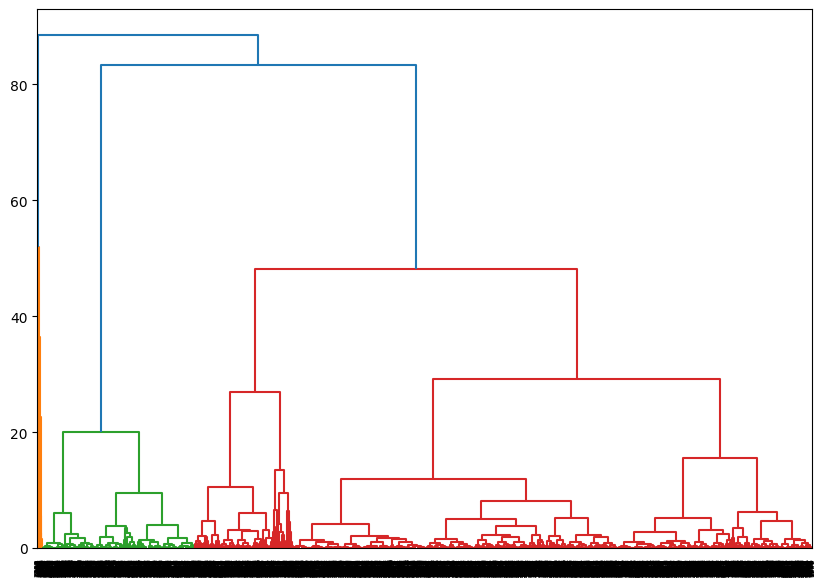

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Compute linkage matrix
Z = linkage(rfm_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# Determine clusters
hierarchical_clusters = fcluster(Z, t=3, criterion='maxclust')
rfm['HierarchicalCluster'] = hierarchical_clusters


In [35]:
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster,HierarchicalCluster
0,12346.0,326,2,0.00,2,2
1,12347.0,2,7,4310.00,0,3
2,12348.0,75,4,1797.24,0,3
3,12349.0,19,1,1757.55,0,3
4,12350.0,310,1,334.40,2,2
...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,2,2
4368,18281.0,181,1,80.82,2,3
4369,18282.0,8,3,176.60,0,3
4370,18283.0,4,16,2094.88,0,3


### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points that are closely packed together and marks points in low-density regions as outliers.

In [36]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['DBSCANCluster'] = dbscan.fit_predict(rfm_scaled)


In [38]:
rfm['DBSCANCluster'].value_counts()

DBSCANCluster
 0    4313
-1      48
 1       6
 2       5
Name: count, dtype: int64

### Agglomerative Clustering

Agglomerative clustering is a type of hierarchical clustering that starts with individual points as clusters and merges the closest pairs until all points are in one cluster.

### GMM

Gaussian Mixture Models (GMM) assumes that the data is generated from a mixture of several Gaussian distributions, each representing a cluster.

In [39]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
rfm['GMMCluster'] = gmm.fit_predict(rfm_scaled)


In [40]:
rfm['GMMCluster'].value_counts()

GMMCluster
2    2717
0    1479
1     176
Name: count, dtype: int64

### Spectral Clustering

Spectral clustering uses the eigenvalues of the similarity matrix to reduce dimensions and then applies clustering.

In [45]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=8, random_state=42)
rfm['SpectralCluster'] = spectral.fit_predict(rfm_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  est = KMeans(


In [46]:
rfm['SpectralCluster'].value_counts()

SpectralCluster
4    4349
3      17
2       3
0       2
1       1
Name: count, dtype: int64

## Saving the Model

In [47]:
import pickle

# Save the scaler and k-means model
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
